In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# vita_half = pd.read_csv(f"/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/V11L12-038_A1_rand/merged_results.tsv", sep='\t')
# vita_half = pd.read_csv(f"/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/V11L12-038_A1_half/merged_results.tsv", sep='\t')

# lipids = pd.read_csv(f"/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/lipids/merged_results.tsv", sep='\t')
# lipids_rand = pd.read_csv(f"/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/lipids_rand/merged_results.tsv", sep='\t')

# neuro = pd.read_csv(f"/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/neuro/merged_results.tsv", sep='\t')
# neuro_rand = pd.read_csv(f"/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/neuro_rand/merged_results.tsv", sep='\t')

# merged_df = pd.concat([vita_half, lipids,neuro], ignore_index=True)

# task = "neuro"
task = "neuro_rand"

# task = 'V11L12-038_A1_rand'
# task = 'V11L12-038_A1_half'
fs = "hvg"
file_path = f"/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/{task}/merged_results.tsv"
df_full = df = pd.read_csv(file_path, sep='\t')
df = df_full[(df_full["featsel"] == fs) & (df_full["method_name"].isin(["xgboost", "elastic_net", "lasso", "gnn", "ridge"]))].copy()

In [8]:
df.head()

rmse       mae        r2   pearson  spearman        task method_name  \
0  0.590927  0.420408 -0.835807  0.830680  0.456907  neuro_rand       ridge   
1  0.601361  0.429399 -0.901653  0.825676  0.453949  neuro_rand       ridge   
2  0.481839  0.313897 -0.216879  0.882680  0.495332  neuro_rand       ridge   
3  0.602566  0.430427 -0.909334  0.825098  0.453616  neuro_rand       ridge   
4  0.467047  0.296481 -0.142132  0.889576  0.501675  neuro_rand       ridge   

  featsel     method_params        hash  
0     hvg    {'alpha': 1.0}  a39239b5a3  
1     hvg    {'alpha': 0.1}  28cafe7bab  
2     hvg  {'alpha': 100.0}  87685202d8  
3     hvg   {'alpha': 0.01}  9b213f3693  
4     hvg  {'alpha': 200.0}  e6d1461ac5

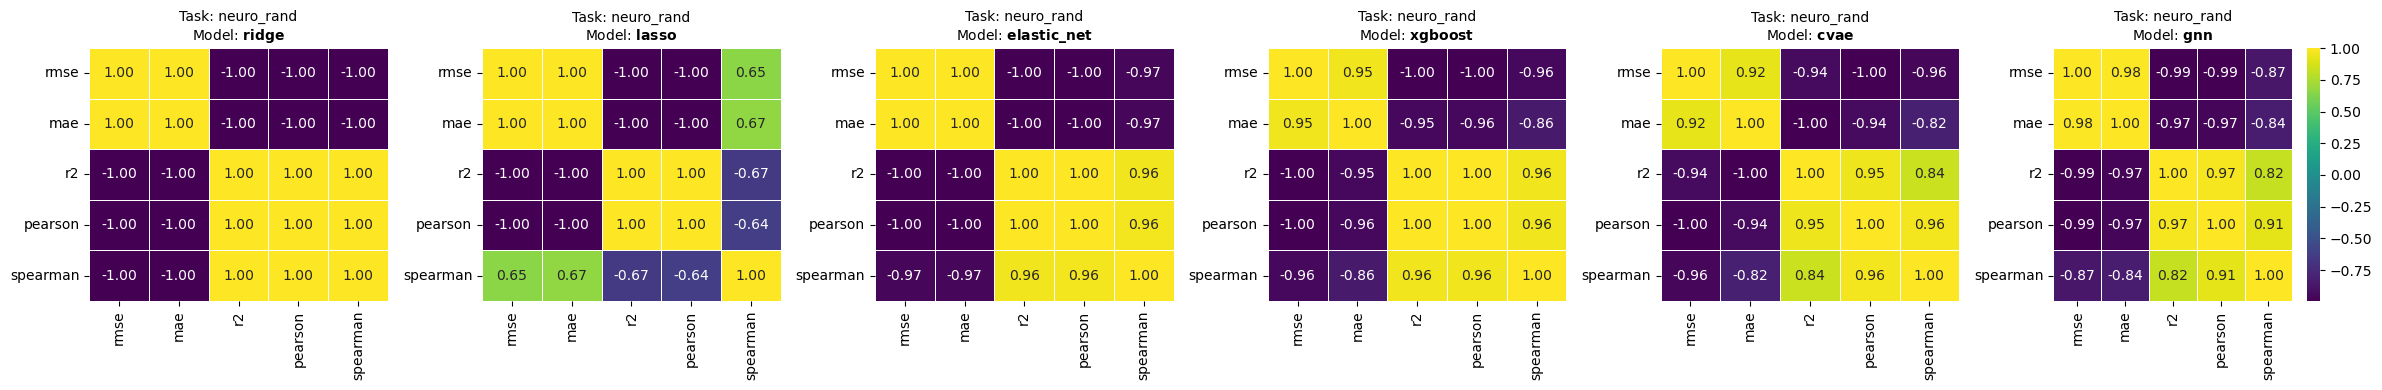

In [ ]:
plot_df = df.copy()
# Get unique tasks and models
tasks = plot_df['task'].unique()
models = plot_df['method_name'].unique()

tasks = plot_df['task'].unique()
models = plot_df['method_name'].unique()


n_tasks = len(tasks)
n_models = len(models)

# Create a subplot grid: rows for tasks, columns for models.
fig, axes = plt.subplots(n_tasks, n_models, figsize=(n_models * 4, n_tasks * 4), squeeze=False)

# Loop over each task (vertical axis) and each model (horizontal axis)
for i, task in enumerate(tasks):
    for j, model in enumerate(models):
        # Filter the DataFrame for the current task and model
        subset = plot_df[(plot_df['task'] == task) & (plot_df['method_name'] == model)]
        
        # If there are no data for the current combination, hide the subplot and move on.
        if subset.empty:
            axes[i][j].axis('off')
            continue
        
        # Select only the performance metrics
        metrics = subset[['rmse', 'mae', 'r2', 'pearson', 'spearman']]
        corr_matrix = metrics.corr()

        # Create the heatmap in the specific subplot cell
        sns.heatmap(corr_matrix,
                    annot=True,
                    cmap='viridis',
                    fmt=".2f",
                    linewidths=0.5,
                    cbar=(j == n_models - 1),  # Show colorbar on the last column only
                    ax=axes[i][j])
        safe_model = model.replace('_', r'\_')  # Escape underscores for LaTeX
        axes[i][j].set_title(f"Task: {task}\nModel: " + r"$\bf{" + safe_model + "}$", fontsize=10)

# Adjust layout and spacing between subplots
plt.tight_layout()
# plt.savefig(f"/lustre/groups/ml01/workspace/eirini/thesis_plots/viz/{task}_{fs}_metricscorr_bestmodels.png", dpi=600, bbox_inches="tight")
plt.show()


### Scatterplots for best models per R2 RMSE and pearson

       rmse       mae        r2   pearson  spearman        task  method_name  \
0  0.525697  0.332185 -0.320370  0.872892  0.485824  neuro_rand         cvae   
1  0.436088  0.260294  0.011413  0.903309  0.523425  neuro_rand  elastic_net   
2  0.472747  0.266199 -0.098460  0.896527  0.514868  neuro_rand          gnn   
3  0.436099  0.260326  0.011436  0.903298  0.524018  neuro_rand        lasso   
4  0.467047  0.296481 -0.142132  0.889576  0.501675  neuro_rand        ridge   
5  0.435352  0.258982  0.011804  0.903987  0.521109  neuro_rand      xgboost   

  featsel                                      method_params        hash  
0     hvg  {'hidden_dim': 1024, 'latent_dim': 100, 'lr': ...  a2327eacb3  
1     hvg                   {'alpha': 0.01, 'l1_ratio': 0.9}  7b11c02fa6  
2     hvg  {'hidden_dim': 768, 'lr': 0.0008, 'epochs': 22...  34806a2c8d  
3     hvg                                    {'alpha': 0.01}  85e71de748  
4     hvg                                   {'alpha': 200.0}  e6

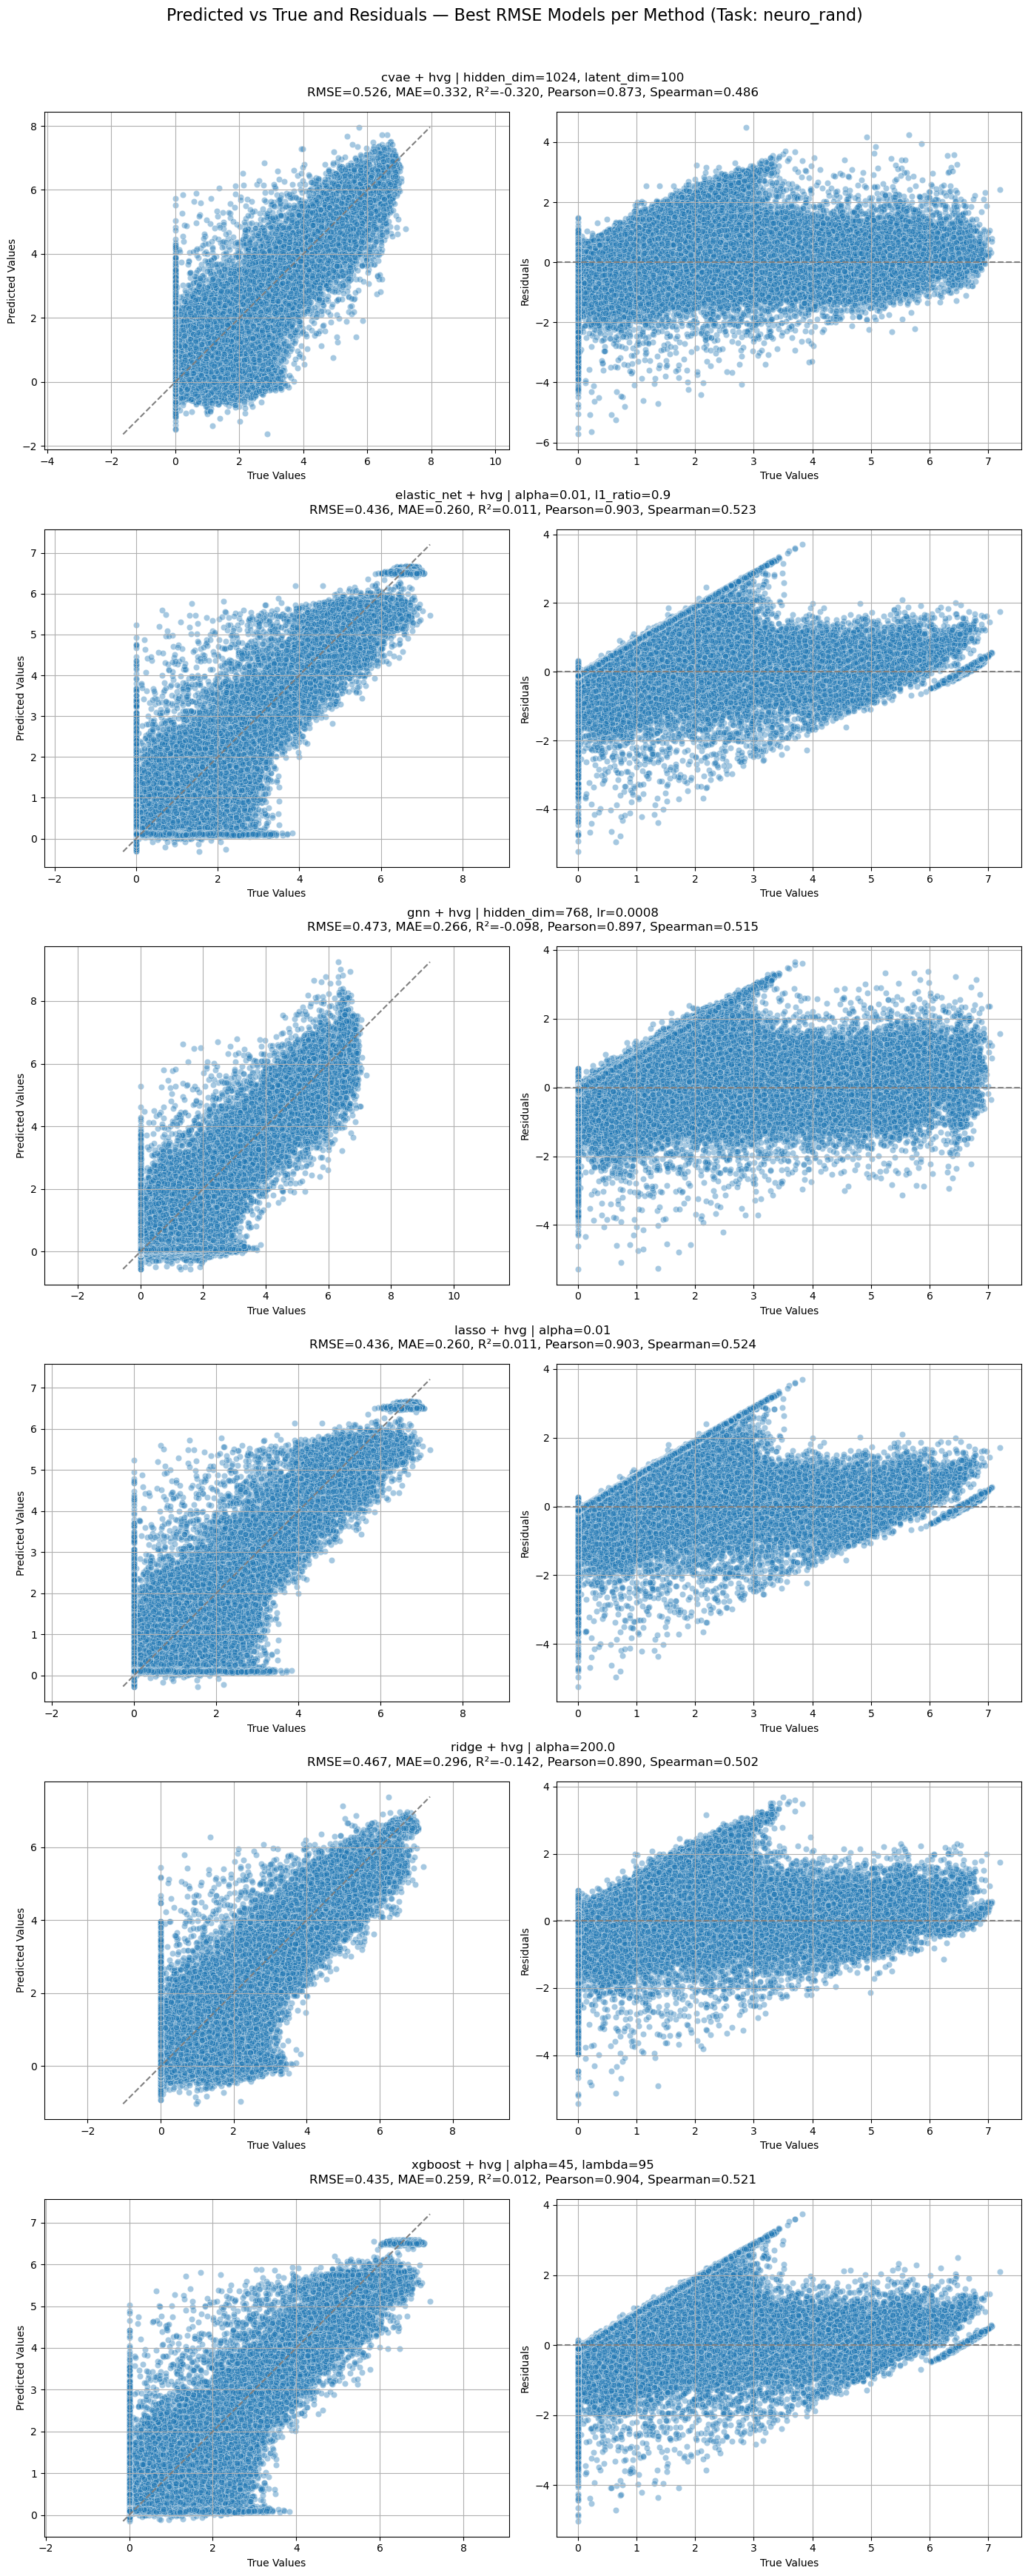

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

base_path = f"/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/{task}"
save_path = f"/lustre/groups/ml01/workspace/eirini/thesis_plots/viz/{task}_{fs}_scatter_rmse_small.png"

featsel_map = {
    'hvg': 'h', 'hvg_svd': 'hs', 'hvg_svd_graph': 'hsg',
    'svd': 's', 'svd_graph': 'sg', 'hvg_nomsi': 'hvg_nomsi'
}

def get_method_label(method_name, featsel, method_params):
    featsel_short = featsel_map.get(featsel, featsel)
    if isinstance(method_params, str):
        try:
            method_params = eval(method_params)
        except:
            method_params = {}
    if not method_params or not isinstance(method_params, dict):
        return f"{method_name}\n{featsel_short}"
    param_parts = [f"{k}={v}" for k, v in list(method_params.items())[:2]]
    return f"{method_name}\n" + "\n".join(param_parts)

# Filter best RMSE per model
df_task = plot_df.copy()
best_models = df_task.loc[df_task.groupby("method_name")["rmse"].idxmin()].reset_index(drop=True)
print(best_models)
n_models = len(best_models)
fig, axs = plt.subplots(n_models, 2, figsize=(14, 6 * n_models))

if n_models == 1:
    axs = [axs]

for i, row in best_models.iterrows():
    model = row["method_name"]
    feature_selection = row["featsel"]
    hash_val = row["hash"]
    method_params = row["method_params"]

    pred_path = os.path.join(base_path, model, feature_selection, hash_val, "predictions.tsv")
    if not os.path.exists(pred_path):
        print(f"Missing: {pred_path}")
        continue

    df = pd.read_csv(pred_path, sep="\t")
    residuals = df["y_true"] - df["y_pred"]

    ax_pred = axs[i][0] if n_models > 1 else axs[0]
    ax_resid = axs[i][1] if n_models > 1 else axs[1]

    # Plot 1
    sns.scatterplot(data=df, x="y_true", y="y_pred", alpha=0.4, ax=ax_pred)
    min_val = min(df["y_true"].min(), df["y_pred"].min())
    max_val = max(df["y_true"].max(), df["y_pred"].max())
    ax_pred.plot([min_val, max_val], [min_val, max_val], ls="--", color="gray")
    ax_pred.set_xlabel("True Values")
    ax_pred.set_ylabel("Predicted Values")
    ax_pred.axis("equal")
    ax_pred.grid(True)

    # Plot 2
    sns.scatterplot(x=df["y_true"], y=residuals, alpha=0.4, ax=ax_resid)
    ax_resid.axhline(0, color="gray", linestyle="--")
    ax_resid.set_xlabel("True Values")
    ax_resid.set_ylabel("Residuals")
    ax_resid.grid(True)

# Final layout adjustment to ensure plot titles appear above subplots
fig.tight_layout(h_pad=4.5, rect=[0, 0.03, 1, 0.96])

# Now add row-wise titles cleanly ABOVE the layout, after tight_layout has set positions
for i, row in best_models.iterrows():
    model = row["method_name"]
    feature_selection = row["featsel"]
    method_params = row["method_params"]

    param_info = ""
    if isinstance(method_params, str):
        try:
            param_dict = eval(method_params)
            items = list(param_dict.items())
            param_info = ", ".join([f"{k}={v}" for k, v in items[:2]])
        except:
            pass

    # Get center position and height above current row
    ax_pred = axs[i][0] if n_models > 1 else axs[0]
    ax_resid = axs[i][1] if n_models > 1 else axs[1]
    bbox1 = ax_pred.get_position()
    bbox2 = ax_resid.get_position()

    x_center = (bbox1.x0 + bbox2.x1) / 2
    y_top = max(bbox1.y1, bbox2.y1) + 0.005  # slightly above plots

    fig.text(
        x_center, y_top,
        f"{model} + {feature_selection} | {param_info}\n"
        f"RMSE={row['rmse']:.3f}, MAE={row['mae']:.3f}, R²={row['r2']:.3f}, "
        f"Pearson={row['pearson']:.3f}, Spearman={row['spearman']:.3f}",
        ha="center", va="bottom", fontsize=12
    )

# Supertitle
fig.suptitle(
    f"Predicted vs True and Residuals — Best RMSE Models per Method (Task: {task})",
    fontsize=16, y=0.995
)

# Save or show
plt.savefig(save_path, dpi=200, bbox_inches="tight")
plt.show()


In [ ]:
dd

In [19]:
task

'V11L12-038_A1_half'

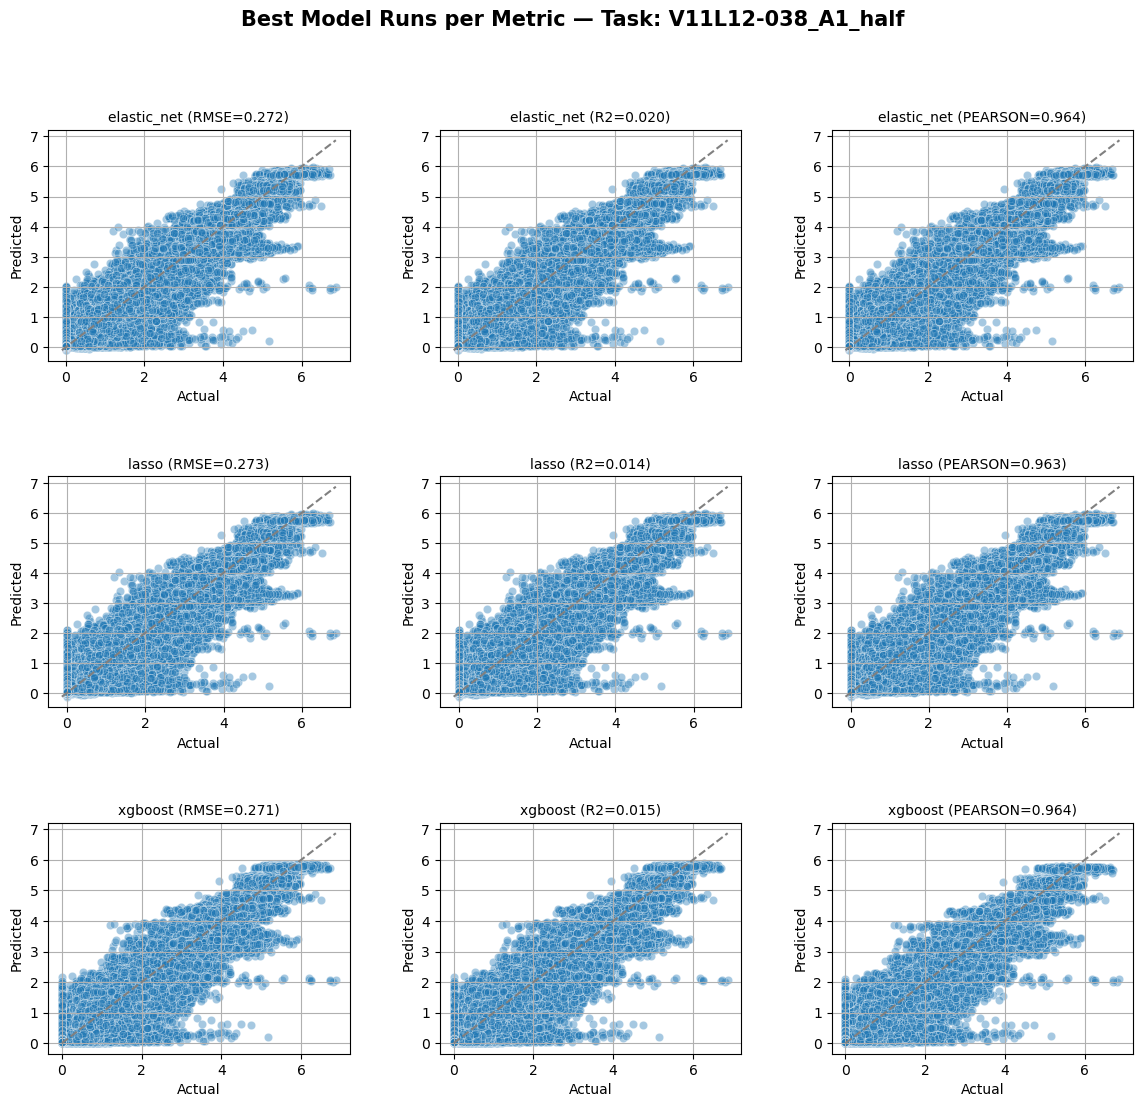

In [21]:
plot_best_scatter_grid(plot_df=plot_df, task_name=task)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ast

def plot_best_scatter_grid(plot_df, task_name="task"):
    """
    Create a 3x3 grid of scatter plots (RMSE, R², Pearson × each model)
    using the best run (lowest RMSE, highest R² or Pearson) for each.
    """
    models = ["elastic_net", "lasso", "xgboost"]
    metrics = ["rmse", "r2", "pearson"]
    direction = {"rmse": "min", "r2": "max", "pearson": "max"}

    fig, axes = plt.subplots(len(models), len(metrics), figsize=(14, 12))
    plt.subplots_adjust(hspace=0.5, wspace=0.3)

    for i, model in enumerate(models):
        for j, metric in enumerate(metrics):
            ascending = direction[metric] == "min"
            model_df = plot_df[plot_df["method_name"] == model]

            if model_df.empty or metric not in model_df.columns:
                axes[i, j].axis("off")
                continue

            best_row = model_df.sort_values(metric, ascending=ascending).iloc[0]
            featsel = best_row["featsel"]
            hash_val = best_row["hash"]
            metric_val = best_row[metric]
            method_params = best_row.get("method_params", "")
            if isinstance(method_params, str):
                try:
                    method_params = ast.literal_eval(method_params)
                except Exception:
                    pass

            base_path = "/lustre/groups/ml01/workspace/eirini/pipeline/data/reports"
            pred_path = os.path.join(base_path, task_name, model, featsel, hash_val, "predictions.tsv")
            if not os.path.exists(pred_path):
                axes[i, j].set_title(f"[Missing file for {model}-{metric}]")
                axes[i, j].axis("off")
                continue

            pred_df = pd.read_csv(pred_path, sep="\t")
            ax = axes[i, j]
            sns.scatterplot(data=pred_df, x="y_true", y="y_pred", alpha=0.4, ax=ax)

            min_val = min(pred_df["y_true"].min(), pred_df["y_pred"].min())
            max_val = max(pred_df["y_true"].max(), pred_df["y_pred"].max())
            ax.plot([min_val, max_val], [min_val, max_val], ls="--", color="gray")

            param_str = ", ".join([f"{k}={v}" for k, v in list(method_params.items())[:2]]) if isinstance(method_params, dict) else str(method_params)
            ax.set_title(f"{model} ({metric.upper()}={metric_val:.3f})", fontsize=10)
            ax.set_xlabel("Actual")
            ax.set_ylabel("Predicted")
            ax.grid(True)

    # Overall title
    fig.suptitle(f"Best Model Runs per Metric — Task: {task_name}", fontsize=15, fontweight='bold', y=0.98)

    # Save or show
    # plt.savefig(f"/lustre/groups/ml01/workspace/eirini/thesis_plots/viz/{task_name}_best_grid_per_model_metric.png", dpi=600, bbox_inches="tight")
    plt.show()
